In [8]:
%pylab inline
from PIL import Image
import os
from io import BytesIO
#from keras.preprocessing import image
import cv2
import hashlib
import time

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named cv2

In [40]:
def split_88(image_data):
    blocks = []
    #image_size = image_data.shape[0]
    image_size = min(image_data.shape[0],image_data.shape[1])
    for i in range(int(image_size / 8)):
        row = image_data[8*i:8*(i+1), :]
        for j in range(int(image_size / 8)):
            col = row[:, 8*j:8*(j+1)]
            blocks.append(col.astype(float32))
    return array(blocks)

def merge_88(blocks):
    block_count = blocks.shape[0]
    edge_len = int(sqrt(block_count))
    img_size = 8*edge_len
    image_rows = []
    for i in range(edge_len):
        img_row = hstack(blocks[edge_len*i: edge_len*(i+1), ...])
        image_rows.append(img_row)
    return vstack(image_rows)

def split_1616(image_data):
    blocks = []
    image_size = image_data.shape[0]
    for i in range(int(image_size / 16)):
        row = image_data[16*i:16*(i+1), :]
        for j in range(int(image_size / 16)):
            col = row[:, 16*j:16*(j+1)]
            blocks.append(col.astype(float32))
    return array(blocks)

def merge_1616(blocks):
    block_count = blocks.shape[0]
    edge_len = int(sqrt(block_count))
    img_size = 16*edge_len
    image_rows = []
    for i in range(edge_len):
        img_row = hstack(blocks[edge_len*i: edge_len*(i+1), ...])
        image_rows.append(img_row)
    return vstack(image_rows)

def zig_zag_flatten(a):
    return np.concatenate([np.diagonal(a[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-a.shape[0], a.shape[0])])

def image_generator(images_dir, target_size=None):
    count = 0
    while True:
        print("Data round %s" % count)
        for filename in os.listdir(images_dir):
            img = Image.open("%s/%s" % (images_dir, filename))
            print("%s/%s" % (images_dir, filename))
            if target_size is not None:
                img = img.resize(target_size)
#             img = image.load_img('%s/%s' % (images_dir, filename), target_size=target_size)

            f = BytesIO()
            img.save(f, format='JPEG', quality=75)
            bytes_content = f.getvalue()
            origin_file_size = len(bytes_content)
            f.seek(0)
            img1 = Image.open(f)
            yield img1, origin_file_size
        count += 1
def file_size(image, quality):
    f = BytesIO()
    image.save(f, format='JPEG', quality = quality)
    file_size = len(f.getvalue())
    return file_size

0
Data round 0
/home/imagenet-data/train/n04116512/n04116512_7153.JPEG
origin_image_size : 29095
origin_image_size : 29079
rec_pil_image_size : 9012
origin_image_size : 29095
crop_size : 22873
compress_rate : 0.3940016613474402
1
/home/imagenet-data/train/n04116512/n04116512_62286.JPEG
origin_image_size : 25789
origin_image_size : 25769
rec_pil_image_size : 17241
origin_image_size : 25789
crop_size : 25205
compress_rate : 0.6840309462408253
2
/home/imagenet-data/train/n04116512/n04116512_51654.JPEG
origin_image_size : 37648
origin_image_size : 37606
rec_pil_image_size : 20641
origin_image_size : 37648
crop_size : 28226
compress_rate : 0.7312761283922624
3
/home/imagenet-data/train/n04116512/n04116512_3728.JPEG
origin_image_size : 30906
origin_image_size : 30878
rec_pil_image_size : 15492
origin_image_size : 30906
crop_size : 24789
compress_rate : 0.6249546169672032
4
/home/imagenet-data/train/n04116512/n04116512_7141.JPEG
origin_image_size : 24649
origin_image_size : 24617
rec_pil_imag

origin_image_size : 25027
rec_pil_image_size : 12571
origin_image_size : 25023
crop_size : 18339
compress_rate : 0.6854790337532035
40
/home/imagenet-data/train/n04116512/n04116512_39382.JPEG
origin_image_size : 32981
origin_image_size : 32963
rec_pil_image_size : 15842
origin_image_size : 32981
crop_size : 23771
compress_rate : 0.6664423036473013
41
/home/imagenet-data/train/n04116512/n04116512_18719.JPEG
origin_image_size : 28129
origin_image_size : 28076
rec_pil_image_size : 16670
origin_image_size : 28129
crop_size : 20897
compress_rate : 0.7977221610757524
42
/home/imagenet-data/train/n04116512/n04116512_41651.JPEG
origin_image_size : 15276
origin_image_size : 15275
rec_pil_image_size : 6930
origin_image_size : 15276
crop_size : 11634
compress_rate : 0.5956678700361011
43
/home/imagenet-data/train/n04116512/n04116512_24147.JPEG
origin_image_size : 12123
origin_image_size : 12148
rec_pil_image_size : 3468
origin_image_size : 12123
crop_size : 8513
compress_rate : 0.4073769528955714

rec_pil_image_size : 4266
origin_image_size : 9289
crop_size : 6843
compress_rate : 0.6234107847435335
78
/home/imagenet-data/train/n04116512/n04116512_8537.JPEG
origin_image_size : 5586
origin_image_size : 5587
rec_pil_image_size : 2510
origin_image_size : 5586
crop_size : 4576
compress_rate : 0.548513986013986
79
/home/imagenet-data/train/n04116512/n04116512_1223.JPEG
origin_image_size : 19904
origin_image_size : 19895
rec_pil_image_size : 7089
origin_image_size : 19904
crop_size : 15638
compress_rate : 0.45331883872617984
80
/home/imagenet-data/train/n04116512/n04116512_3307.JPEG
origin_image_size : 39299
origin_image_size : 39293
rec_pil_image_size : 18776
origin_image_size : 39299
crop_size : 28977
compress_rate : 0.6479621768989199
81
/home/imagenet-data/train/n04116512/n04116512_18745.JPEG
origin_image_size : 16712
origin_image_size : 16699
rec_pil_image_size : 6389
origin_image_size : 16712
crop_size : 11278
compress_rate : 0.5665011526866466
82
/home/imagenet-data/train/n04116

origin_image_size : 69624
origin_image_size : 69490
rec_pil_image_size : 51340
origin_image_size : 69624
crop_size : 51919
compress_rate : 0.9888480132514108
116
/home/imagenet-data/train/n04116512/n04116512_1316.JPEG
origin_image_size : 40368
origin_image_size : 40385
rec_pil_image_size : 20069
origin_image_size : 40368
crop_size : 30084
compress_rate : 0.667098790054514
117
/home/imagenet-data/train/n04116512/n04116512_8836.JPEG
origin_image_size : 65892
origin_image_size : 65795
rec_pil_image_size : 46237
origin_image_size : 65892
crop_size : 49048
compress_rate : 0.9426887946501387
118
/home/imagenet-data/train/n04116512/n04116512_19050.JPEG
origin_image_size : 23186
origin_image_size : 23086
rec_pil_image_size : 8970
origin_image_size : 23186
crop_size : 15082
compress_rate : 0.5947487070680281
119
/home/imagenet-data/train/n04116512/n04116512_4118.JPEG
origin_image_size : 472036
origin_image_size : 472054
rec_pil_image_size : 114240
origin_image_size : 472036
crop_size : 353328
c

origin_image_size : 18912
origin_image_size : 18912
rec_pil_image_size : 8151
origin_image_size : 18912
crop_size : 11792
compress_rate : 0.691231343283582
155
/home/imagenet-data/train/n04116512/n04116512_3603.JPEG
origin_image_size : 14045
origin_image_size : 14022
rec_pil_image_size : 6941
origin_image_size : 14045
crop_size : 10645
compress_rate : 0.6520432127759511
156
/home/imagenet-data/train/n04116512/n04116512_3126.JPEG
origin_image_size : 24459
origin_image_size : 24430
rec_pil_image_size : 8670
origin_image_size : 24459
crop_size : 17873
compress_rate : 0.4850892407542103
157
/home/imagenet-data/train/n04116512/n04116512_5028.JPEG
origin_image_size : 11663
origin_image_size : 11657
rec_pil_image_size : 6074
origin_image_size : 11663
crop_size : 9367
compress_rate : 0.6484466744955696
158
/home/imagenet-data/train/n04116512/n04116512_10149.JPEG
origin_image_size : 32376
origin_image_size : 32299
rec_pil_image_size : 18594
origin_image_size : 32376
crop_size : 28512
compress_r

rec_pil_image_size : 20611
origin_image_size : 39620
crop_size : 29408
compress_rate : 0.700863710554951
193
/home/imagenet-data/train/n04116512/n04116512_26065.JPEG
origin_image_size : 15245
origin_image_size : 15202
rec_pil_image_size : 4452
origin_image_size : 15245
crop_size : 11078
compress_rate : 0.40187759523379674
194
/home/imagenet-data/train/n04116512/n04116512_19709.JPEG
origin_image_size : 11840
origin_image_size : 11845
rec_pil_image_size : 6056
origin_image_size : 11840
crop_size : 8867
compress_rate : 0.6829818427878651
195
/home/imagenet-data/train/n04116512/n04116512_11395.JPEG
origin_image_size : 28873
origin_image_size : 28834
rec_pil_image_size : 11897
origin_image_size : 28873
crop_size : 15960
compress_rate : 0.7454260651629072
196
/home/imagenet-data/train/n04116512/n04116512_20214.JPEG
origin_image_size : 38397
origin_image_size : 38330
rec_pil_image_size : 27603
origin_image_size : 38397
crop_size : 30769
compress_rate : 0.8971042282817121
197
/home/imagenet-da

origin_image_size : 21104
origin_image_size : 21068
rec_pil_image_size : 6390
origin_image_size : 21104
crop_size : 14590
compress_rate : 0.43797121315969845
231
/home/imagenet-data/train/n04116512/n04116512_2831.JPEG
origin_image_size : 70154
origin_image_size : 70121
rec_pil_image_size : 47685
origin_image_size : 70154
crop_size : 45236
compress_rate : 1.0541382969316473
232
/home/imagenet-data/train/n04116512/n04116512_28638.JPEG
origin_image_size : 30857
origin_image_size : 30830
rec_pil_image_size : 16872
origin_image_size : 30857
crop_size : 25057
compress_rate : 0.6733447739154728
233
/home/imagenet-data/train/n04116512/n04116512_61438.JPEG
origin_image_size : 26574
origin_image_size : 26535
rec_pil_image_size : 11450
origin_image_size : 26574
crop_size : 18659
compress_rate : 0.6136448898654805
234
/home/imagenet-data/train/n04116512/n04116512_37851.JPEG
origin_image_size : 55252
origin_image_size : 55201
rec_pil_image_size : 32058
origin_image_size : 55252
crop_size : 39727
co

rec_pil_image_size : 4913
origin_image_size : 15860
crop_size : 8311
compress_rate : 0.5911442666345806
269
/home/imagenet-data/train/n04116512/n04116512_26233.JPEG
origin_image_size : 17501
origin_image_size : 17484
rec_pil_image_size : 6615
origin_image_size : 17501
crop_size : 13156
compress_rate : 0.5028124049863181
270
/home/imagenet-data/train/n04116512/n04116512_3162.JPEG
origin_image_size : 16102
origin_image_size : 16101
rec_pil_image_size : 7899
origin_image_size : 16102
crop_size : 12422
compress_rate : 0.6358879407502818
271
/home/imagenet-data/train/n04116512/n04116512_17215.JPEG
origin_image_size : 13297
origin_image_size : 13287
rec_pil_image_size : 6255
origin_image_size : 13297
crop_size : 10215
compress_rate : 0.6123348017621145
272
/home/imagenet-data/train/n04116512/n04116512_587.JPEG
origin_image_size : 67614
origin_image_size : 67459
rec_pil_image_size : 42818
origin_image_size : 67614
crop_size : 43979
compress_rate : 0.9736010368585006
273
/home/imagenet-data/tr

rec_pil_image_size : 8309
origin_image_size : 17520
crop_size : 13460
compress_rate : 0.6173105497771174
307
/home/imagenet-data/train/n04116512/n04116512_8935.JPEG
origin_image_size : 31387
origin_image_size : 31336
rec_pil_image_size : 15878
origin_image_size : 31387
crop_size : 21986
compress_rate : 0.7221868461748385
308
/home/imagenet-data/train/n04116512/n04116512_20120.JPEG
origin_image_size : 19070
origin_image_size : 19054
rec_pil_image_size : 6781
origin_image_size : 19070
crop_size : 12826
compress_rate : 0.528691719943864
309
/home/imagenet-data/train/n04116512/n04116512_25576.JPEG
origin_image_size : 16298
origin_image_size : 16286
rec_pil_image_size : 4377
origin_image_size : 16298
crop_size : 7176
compress_rate : 0.6099498327759197
310
/home/imagenet-data/train/n04116512/n04116512_236.JPEG
origin_image_size : 35689
origin_image_size : 35630
rec_pil_image_size : 22040
origin_image_size : 35689
crop_size : 24877
compress_rate : 0.8859589178759497
311
/home/imagenet-data/tr

rec_pil_image_size : 16419
origin_image_size : 35604
crop_size : 24863
compress_rate : 0.6603788762418051
346
/home/imagenet-data/train/n04116512/n04116512_27497.JPEG
origin_image_size : 49224
origin_image_size : 49137
rec_pil_image_size : 28007
origin_image_size : 49224
crop_size : 31905
compress_rate : 0.8778247923522958
347
/home/imagenet-data/train/n04116512/n04116512_6741.JPEG
origin_image_size : 5435
origin_image_size : 5435
rec_pil_image_size : 2777
origin_image_size : 5435
crop_size : 3446
compress_rate : 0.80586186883343
348
/home/imagenet-data/train/n04116512/n04116512_24758.JPEG
origin_image_size : 19110
origin_image_size : 19103
rec_pil_image_size : 9349
origin_image_size : 19110
crop_size : 15125
compress_rate : 0.6181157024793389
349
/home/imagenet-data/train/n04116512/n04116512_35527.JPEG
origin_image_size : 24312
origin_image_size : 24293
rec_pil_image_size : 9936
origin_image_size : 24312
crop_size : 17189
compress_rate : 0.5780440979696317
350
/home/imagenet-data/trai

rec_pil_image_size : 5522
origin_image_size : 16057
crop_size : 11181
compress_rate : 0.49387353546194435
384
/home/imagenet-data/train/n04116512/n04116512_2643.JPEG
origin_image_size : 10016
origin_image_size : 10010
rec_pil_image_size : 5050
origin_image_size : 10016
crop_size : 7160
compress_rate : 0.7053072625698324
385
/home/imagenet-data/train/n04116512/n04116512_45592.JPEG
origin_image_size : 44876
origin_image_size : 44809
rec_pil_image_size : 23322
origin_image_size : 44876
crop_size : 32677
compress_rate : 0.7137130091501668
386
/home/imagenet-data/train/n04116512/n04116512_62385.JPEG
origin_image_size : 28719
origin_image_size : 28705
rec_pil_image_size : 9441
origin_image_size : 28719
crop_size : 18171
compress_rate : 0.5195641406636949
387
/home/imagenet-data/train/n04116512/n04116512_26632.JPEG
origin_image_size : 10199
origin_image_size : 10184
rec_pil_image_size : 5951
origin_image_size : 10199
crop_size : 7611
compress_rate : 0.7818946261989226
388
/home/imagenet-data/

rec_pil_image_size : 7171
origin_image_size : 18537
crop_size : 18527
compress_rate : 0.3870567280185675
422
/home/imagenet-data/train/n04116512/n04116512_85267.JPEG
origin_image_size : 19140
origin_image_size : 19154
rec_pil_image_size : 8965
origin_image_size : 19140
crop_size : 12726
compress_rate : 0.7044633034732045
423
/home/imagenet-data/train/n04116512/n04116512_9009.JPEG
origin_image_size : 20327
origin_image_size : 20316
rec_pil_image_size : 8098
origin_image_size : 20327
crop_size : 12462
compress_rate : 0.6498154389343604
424
/home/imagenet-data/train/n04116512/n04116512_23126.JPEG
origin_image_size : 12981
origin_image_size : 12960
rec_pil_image_size : 6723
origin_image_size : 12981
crop_size : 10320
compress_rate : 0.651453488372093
425
/home/imagenet-data/train/n04116512/n04116512_5744.JPEG
origin_image_size : 14388
origin_image_size : 14385
rec_pil_image_size : 2451
origin_image_size : 14388
crop_size : 6301
compress_rate : 0.3889858752578956
426
/home/imagenet-data/tra

origin_image_size : 110162
origin_image_size : 110165
rec_pil_image_size : 39841
origin_image_size : 110162
crop_size : 61238
compress_rate : 0.6505927691955975
460
/home/imagenet-data/train/n04116512/n04116512_18036.JPEG
origin_image_size : 16988
origin_image_size : 16979
rec_pil_image_size : 7016
origin_image_size : 16988
crop_size : 12295
compress_rate : 0.5706384709231395
461
/home/imagenet-data/train/n04116512/n04116512_5180.JPEG
origin_image_size : 28732
origin_image_size : 28650
rec_pil_image_size : 14843
origin_image_size : 28732
crop_size : 24858
compress_rate : 0.5971115938530855
462
/home/imagenet-data/train/n04116512/n04116512_16202.JPEG
origin_image_size : 14635
origin_image_size : 14635
rec_pil_image_size : 8852
origin_image_size : 14635
crop_size : 13250
compress_rate : 0.6680754716981132
463
/home/imagenet-data/train/n04116512/n04116512_53494.JPEG
origin_image_size : 37353
origin_image_size : 37285
rec_pil_image_size : 20681
origin_image_size : 37353
crop_size : 36655
c

rec_pil_image_size : 8092
origin_image_size : 23075
crop_size : 16708
compress_rate : 0.48431888915489585
499
/home/imagenet-data/train/n04116512/n04116512_27169.JPEG
origin_image_size : 45410
origin_image_size : 45397
rec_pil_image_size : 18850
origin_image_size : 45410
crop_size : 27189
compress_rate : 0.693295082570157
500
/home/imagenet-data/train/n04116512/n04116512_10849.JPEG
origin_image_size : 6492
origin_image_size : 6484
rec_pil_image_size : 3124
origin_image_size : 6492
crop_size : 3819
compress_rate : 0.8180151872217858
501
/home/imagenet-data/train/n04116512/n04116512_82794.JPEG
origin_image_size : 18230
origin_image_size : 18212
rec_pil_image_size : 8092
origin_image_size : 18230
crop_size : 12350
compress_rate : 0.6552226720647774
502
/home/imagenet-data/train/n04116512/n04116512_10795.JPEG
origin_image_size : 24126
origin_image_size : 24120
rec_pil_image_size : 14919
origin_image_size : 24126
crop_size : 21219
compress_rate : 0.7030962816343843
503
/home/imagenet-data/t

rec_pil_image_size : 6066
origin_image_size : 11001
crop_size : 8558
compress_rate : 0.7088104697359197
538
/home/imagenet-data/train/n04116512/n04116512_13333.JPEG
origin_image_size : 17690
origin_image_size : 17687
rec_pil_image_size : 8431
origin_image_size : 17690
crop_size : 14695
compress_rate : 0.573732562095951
539
/home/imagenet-data/train/n04116512/n04116512_22443.JPEG
origin_image_size : 17806
origin_image_size : 17806
rec_pil_image_size : 8796
origin_image_size : 17806
crop_size : 13553
compress_rate : 0.6490075997934037
540
/home/imagenet-data/train/n04116512/n04116512_20506.JPEG
origin_image_size : 19330
origin_image_size : 19315
rec_pil_image_size : 6348
origin_image_size : 19330
crop_size : 15097
compress_rate : 0.42048089024309465
541
/home/imagenet-data/train/n04116512/n04116512_44402.JPEG
origin_image_size : 38555
origin_image_size : 38562
rec_pil_image_size : 25425
origin_image_size : 38555
crop_size : 28765
compress_rate : 0.8838866678254823
542
/home/imagenet-data

rec_pil_image_size : 14174
origin_image_size : 26793
crop_size : 21869
compress_rate : 0.6481320590790617
576
/home/imagenet-data/train/n04116512/n04116512_27054.JPEG
origin_image_size : 22121
origin_image_size : 22110
rec_pil_image_size : 6392
origin_image_size : 22121
crop_size : 13928
compress_rate : 0.45893164847788626
577
/home/imagenet-data/train/n04116512/n04116512_42531.JPEG
origin_image_size : 25089
origin_image_size : 25086
rec_pil_image_size : 8054
origin_image_size : 25089
crop_size : 16360
compress_rate : 0.49229828850855745
578
/home/imagenet-data/train/n04116512/n04116512_45774.JPEG
origin_image_size : 18793
origin_image_size : 18787
rec_pil_image_size : 4381
origin_image_size : 18793
crop_size : 9044
compress_rate : 0.48440955329500224
579
/home/imagenet-data/train/n04116512/n04116512_12643.JPEG
origin_image_size : 22194
origin_image_size : 22196
rec_pil_image_size : 12302
origin_image_size : 22194
crop_size : 17961
compress_rate : 0.6849284560993263
580
/home/imagenet-

rec_pil_image_size : 13014
origin_image_size : 25088
crop_size : 19963
compress_rate : 0.6519060261483745
615
/home/imagenet-data/train/n04116512/n04116512_50453.JPEG
origin_image_size : 17375
origin_image_size : 17354
rec_pil_image_size : 6392
origin_image_size : 17375
crop_size : 10346
compress_rate : 0.6178233133578195
616
/home/imagenet-data/train/n04116512/n04116512_17898.JPEG
origin_image_size : 14555
origin_image_size : 14561
rec_pil_image_size : 4574
origin_image_size : 14555
crop_size : 7428
compress_rate : 0.6157781367797522
617
/home/imagenet-data/train/n04116512/n04116512_5387.JPEG
origin_image_size : 36396
origin_image_size : 36251
rec_pil_image_size : 17288
origin_image_size : 36396
crop_size : 25732
compress_rate : 0.6718482822944194
618
/home/imagenet-data/train/n04116512/n04116512_31898.JPEG
origin_image_size : 20674
origin_image_size : 20665
rec_pil_image_size : 6823
origin_image_size : 20674
crop_size : 12437
compress_rate : 0.5486049690439817
619
/home/imagenet-data

rec_pil_image_size : 17291
origin_image_size : 34828
crop_size : 33391
compress_rate : 0.5178341469258183
653
/home/imagenet-data/train/n04116512/n04116512_2003.JPEG
origin_image_size : 5263
origin_image_size : 5256
rec_pil_image_size : 1463
origin_image_size : 5263
crop_size : 2192
compress_rate : 0.6674270072992701
654
/home/imagenet-data/train/n04116512/n04116512_7371.JPEG
origin_image_size : 31248
origin_image_size : 31248
rec_pil_image_size : 21549
origin_image_size : 31248
crop_size : 25496
compress_rate : 0.8451914025729527
655
/home/imagenet-data/train/n04116512/n04116512_27779.JPEG
origin_image_size : 32647
origin_image_size : 32576
rec_pil_image_size : 12999
origin_image_size : 32647
crop_size : 23244
compress_rate : 0.5592410944759938
656
/home/imagenet-data/train/n04116512/n04116512_18342.JPEG
origin_image_size : 18648
origin_image_size : 18647
rec_pil_image_size : 9301
origin_image_size : 18648
crop_size : 15115
compress_rate : 0.6153489910684751
657
/home/imagenet-data/tr

rec_pil_image_size : 13713
origin_image_size : 33464
crop_size : 26022
compress_rate : 0.5269771731611713
691
/home/imagenet-data/train/n04116512/n04116512_25975.JPEG
origin_image_size : 20285
origin_image_size : 20290
rec_pil_image_size : 5884
origin_image_size : 20285
crop_size : 13106
compress_rate : 0.4489546772470624
692
/home/imagenet-data/train/n04116512/n04116512_41672.JPEG
origin_image_size : 33569
origin_image_size : 33513
rec_pil_image_size : 12940
origin_image_size : 33569
crop_size : 23605
compress_rate : 0.5481889430205465
693
/home/imagenet-data/train/n04116512/n04116512_23453.JPEG
origin_image_size : 38917
origin_image_size : 38866
rec_pil_image_size : 25382
origin_image_size : 38917
crop_size : 31358
compress_rate : 0.8094266215957651
694
/home/imagenet-data/train/n04116512/n04116512_95673.JPEG
origin_image_size : 11101
origin_image_size : 11097
rec_pil_image_size : 4985
origin_image_size : 11101
crop_size : 7709
compress_rate : 0.6466467764950058
695
/home/imagenet-da

rec_pil_image_size : 9615
origin_image_size : 22065
crop_size : 15395
compress_rate : 0.624553426437155
730
/home/imagenet-data/train/n04116512/n04116512_42058.JPEG
origin_image_size : 57189
origin_image_size : 57165
rec_pil_image_size : 17472
origin_image_size : 57189
crop_size : 37530
compress_rate : 0.46554756195043967
731
/home/imagenet-data/train/n04116512/n04116512_5088.JPEG
origin_image_size : 20450
origin_image_size : 20440
rec_pil_image_size : 6941
origin_image_size : 20450
crop_size : 14848
compress_rate : 0.46747036637931033
732
/home/imagenet-data/train/n04116512/n04116512_12107.JPEG
origin_image_size : 42976
origin_image_size : 42929
rec_pil_image_size : 23209
origin_image_size : 42976
crop_size : 32062
compress_rate : 0.7238787349510324
733
/home/imagenet-data/train/n04116512/n04116512_17874.JPEG
origin_image_size : 24961
origin_image_size : 24952
rec_pil_image_size : 11987
origin_image_size : 24961
crop_size : 24510
compress_rate : 0.4890656874745002
734
/home/imagenet-d

rec_pil_image_size : 15735
origin_image_size : 32495
crop_size : 23096
compress_rate : 0.6812868029095948
769
/home/imagenet-data/train/n04116512/n04116512_32794.JPEG
origin_image_size : 125402
origin_image_size : 125373
rec_pil_image_size : 81831
origin_image_size : 125402
crop_size : 122517
compress_rate : 0.6679154729547736
770
/home/imagenet-data/train/n04116512/n04116512_7026.JPEG
origin_image_size : 39789
origin_image_size : 39781
rec_pil_image_size : 17756
origin_image_size : 39789
crop_size : 22195
compress_rate : 0.8
771
/home/imagenet-data/train/n04116512/n04116512_19027.JPEG
origin_image_size : 31595
origin_image_size : 31561
rec_pil_image_size : 13573
origin_image_size : 31595
crop_size : 20696
compress_rate : 0.655827212988017
772
/home/imagenet-data/train/n04116512/n04116512_49373.JPEG
origin_image_size : 16974
origin_image_size : 16956
rec_pil_image_size : 4587
origin_image_size : 16974
crop_size : 11523
compress_rate : 0.39807341838063004
773
/home/imagenet-data/train/n

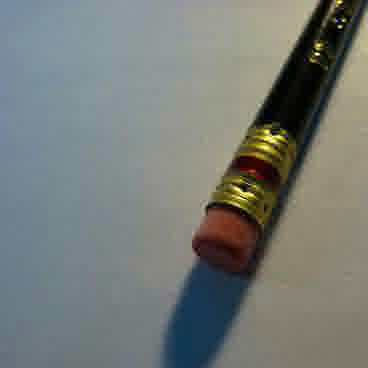

In [42]:
generator = image_generator('/home/imagenet-data/train/n04116512')
start = time.clock()
compress_rates = []
for i in range(800):
    print(i)
    origin_image, origin_image_size= next(generator)
    print("origin_image_size :",origin_image_size)
    print("origin_image_size :",file_size(origin_image,75))

    # DeepN-JPEG
    img_yuv = origin_image.convert('YCbCr')
    channels = img_yuv.split()

    rec_channels = []
    q_tables = []
    for channel in channels:
        # split and shift
        blocks = split_88(asarray(channel)) - 128
        # dct and get std_matrix
        dct_blocks = array([cv2.dct(item) for item in blocks])
        std_matrix = zeros([8, 8])
        for i in range(8):
            for j in range(8):
                std_matrix[i, j] = std(dct_blocks[:,i,j], ddof=1)

        # Build Q-table
        q_table = zeros([8, 8], dtype=int64)
        a = 255
        b = 80
        c = 240
        T1 = 20
        T2 = 60
        k1 = 9.75
        k2 = 1
        k3 = 3
        Qmin = 5
        for i in range(8):
            for j in range(8):
                std_value = std_matrix[i, j]
                if std_value <= T1:
                    q = a - k1 * std_value
                elif std_value > T2:
                    q = c - k3 * std_value
                else:
                    q = b - k2 * std_value
                q = (q if (q > Qmin) else Qmin)
                q_table[i, j] = q
        
        q_tables.append(q_table)

        # quantization by q-table and recovery from q-table
        quantizd_dct_blocks = np.round(array([block / q_table for block in dct_blocks]))
        rec_dct_blocks = array([block * q_table for block in quantizd_dct_blocks])
        # idct, round and shift
        idct_rec_blocks = np.round(array([cv2.idct(block) for block in rec_dct_blocks])) + 128
        # merge into an image
        rec_channel = merge_88(idct_rec_blocks)
        
        rec_channels.append(clip(rec_channel, 0, 255))

    rec_channels = array(rec_channels, dtype=uint8)

    pil_channels = [Image.fromarray(channel) for channel in rec_channels]

    # image and compress image
    rec_image = Image.merge("YCbCr", channels).convert('RGB')
    rec_pil_image = Image.merge("YCbCr", pil_channels).convert('RGB')

    # compute file size
    rec_pil_image
    f2 = BytesIO()
    rec_pil_image.save(f2, format='JPEG', quality=75)#qtables=pil_qtables)
    rec_pil_image_size = len(f2.getvalue())

    # compute compress_rate
    print("rec_pil_image_size :",rec_pil_image_size)
    print("origin_image_size :",origin_image_size)
    
    image_size = size(rec_pil_image)[0]
    cropped = origin_image.crop((0, 0, image_size, image_size))
    cropped_size = file_size(cropped,75)
    print("crop_size :",cropped_size)
    
    compress_rate = (rec_pil_image_size/cropped_size)
    print("compress_rate :",compress_rate)
    compress_rates.append(compress_rate)
end = time.clock()
print("runing time",end-start)
rec_pil_image

In [44]:
print(len(compress_rates),mean(compress_rates))

800 0.6417586007605665


In [35]:
#img = Image.open("/home/imagenet-data/train/n03085013/n03085013_21004.JPEG")
file_size(origin_image,75)

15605